In [3]:
import numpy as np
from matplotlib import pyplot as plt

In [54]:
y = np.random.standard_normal(1000)

(array([  8.,  21.,  66., 154., 208., 228., 165.,  96.,  39.,  15.]),
 array([-3.03394325, -2.44481579, -1.85568834, -1.26656088, -0.67743343,
        -0.08830597,  0.50082148,  1.08994894,  1.67907639,  2.26820385,
         2.85733131]),
 <a list of 10 Patch objects>)

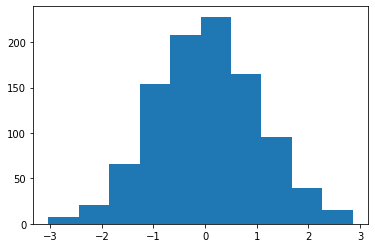

In [55]:
plt.hist(y)

(array([ 2.,  5., 10.,  7., 22., 18., 22.,  8.,  2.,  4.]),
 array([-175.98810135, -124.40999939,  -72.83189743,  -21.25379548,
          30.32430648,   81.90240844,  133.48051039,  185.05861235,
         236.63671431,  288.21481626,  339.79291822]),
 <a list of 10 Patch objects>)

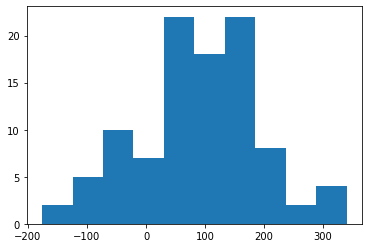

In [70]:
plt.hist(np.random.normal(100, 100, 100))

In [91]:
# TRUE GENERATING FUNCTION
slope = 10
intercept = 200
noise_mean = 0
noise_std = 10
def y_fn(x):    
    y = slope*x + intercept + np.random.normal(noise_mean, noise_std, x.shape[0])
    return y

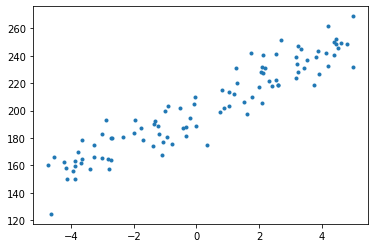

In [100]:
num_test_points = 100
x = np.random.uniform(-5, 5, num_test_points)
y = y_fn(x)
plt.plot(x, y, '.')

In [101]:
num_test_points = 1000
x_test = np.random.uniform(-5,5,num_test_points)
y_test = y_fn(x_test)

In [102]:
from sklearn import linear_model

# Normal regression with intercept
lr = linear_model.LinearRegression(fit_intercept=True)
res = lr.fit(x[:,np.newaxis], y)
print(f'slope: {res.coef_}, Intercept: {res.intercept_}')
print(f'score: {res.score(x_test[:, np.newaxis], y_test)}')

slope: [10.27662626], Intercept: 199.96994140528582
score: 0.8924603644505833


In [103]:
# Regression without intercept
lr = linear_model.LinearRegression(fit_intercept=False)
res = lr.fit(x[:,np.newaxis], y)
print(f'slope: {res.coef_}, Intercept: {res.intercept_}')
print(f'score: {res.score(x_test[:, np.newaxis], y_test)}')

slope: [17.32073606], Intercept: 0.0
score: -41.40162014677358


In [113]:
# Regression with manual intercept and no sklearn intercept
x_int = np.stack([x, np.ones(x.shape[0])], axis=1)
print(x_int.shape)
lr = linear_model.LinearRegression(fit_intercept=False)
res = lr.fit(x_int, y)
print(f'slope: {res.coef_}, Intercept: {res.intercept_}')

x_test_int = np.stack([x_test, np.ones(x_test.shape[0])], axis=1)
print(f'score: {res.score(x_test_int, y_test)}')

(100, 2)
slope: [ 10.27662626 199.96994141], Intercept: 0.0
score: 0.8924603644505833


In [114]:
# Regression with manual intercept and an sklearn intercept

lr = linear_model.LinearRegression(fit_intercept=True)
res = lr.fit(x_int, y)
print(f'slope: {res.coef_}, Intercept: {res.intercept_}')
print(f'score: {res.score(x_test_int, y_test)}')

slope: [10.27662626  0.        ], Intercept: 199.96994140528582
score: 0.8924603644505833
